# Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Eat The Cheeze 🐭🧀

## Cute Mouse Environment

![Mouse Environment](./assets/mouse.png)

## Utils

In [2]:
def visualize_mouse_env(locations, matrix=np.zeros((2,3))):
    rows, cols = len(matrix), len(matrix[0])
    binary_matrix = np.array(matrix)

    # Plot the maze
    plt.figure(figsize=(cols, rows))
    plt.imshow(binary_matrix, cmap='binary', interpolation='nearest')

    # Add grid lines between each cell
    for i in range(cols - 1):
        plt.axvline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)
    for i in range(rows - 1):
        plt.axhline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Display the start and finish points using scatter
    plt.scatter(locations['cheese-small'][1], locations['cheese-small'][0], color='orange', s=200, marker='s', label='cheese-small')
    plt.scatter(locations['cheese-big'][1], locations['cheese-big'][0], color='orange', s=500, marker='s', label='cheese-big')
    plt.scatter(locations['poison'][1], locations['poison'][0], color='red', s=500, marker='s', label='poison')
    plt.scatter(locations['mouse'][1], locations['mouse'][0], color='gray', s=100, marker='o', label='mouse')

    # Customize plot appearance
    plt.title('Mouse Env Visualization')
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)  # Hide grid lines

    # Display the maze
    plt.show()

In [3]:
def draw_q_table(state_action_values, actions):
    num_states, num_actions = state_action_values.shape

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.axis('off')  # Turn off the axis

    # Create a table
    table_data = []
    for state in range(num_states):
        row_data = [f'[{state//3}, {state%3}]']
        for action in range(num_actions):
            q_value = state_action_values[state, action]
            row_data.append(f'{q_value:.1f}')
        table_data.append(row_data)

    # Display the table
    table = ax.table(cellText=table_data, loc='center', colLabels=['State-Action'] + [f'{a}' for a in actions],
                     cellLoc='center', colColours=['#f0f0f0']*(num_actions+1), colWidths=[0.2]*(num_actions+1))

    # Set font size
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Adjust the layout
    table.auto_set_column_width(1.5)
    
    # Add more space between cells
    table.scale(1.5, 1.5)

    # Show the plot
    plt.show()

In [4]:
def move(current_location, action, rewards, initial_location=[0,0]):
    if action == 'Up':
        if current_location[0] != 0:
            updated_location = [current_location[0] - 1, current_location[1]]
            if str(updated_location) in rewards.keys():
                if rewards[str(updated_location)] < 0:
                    return initial_location, rewards[str(updated_location)]
                else:
                    return updated_location, rewards[str(updated_location)]
            else:
                return updated_location, 0
        else:
            return current_location, 0
    
    if action == 'Down':
        if current_location[0] != 1:
            updated_location = [current_location[0] + 1, current_location[1]]
            if str(updated_location) in rewards.keys():
                if rewards[str(updated_location)] < 0:
                    return initial_location, rewards[str(updated_location)]
                else:
                    return updated_location, rewards[str(updated_location)]
            else:
                return updated_location, 0
        else:
            return current_location, 0
    
    if action == 'Left':
        if current_location[1] != 0:
            updated_location = [current_location[0], current_location[1] - 1]
            if str(updated_location) in rewards.keys():
                if rewards[str(updated_location)] < 0:
                    return initial_location, rewards[str(updated_location)]
                else:
                    return updated_location, rewards[str(updated_location)]
            else:
                return updated_location, 0
        else:
            return current_location, 0
        
    if action == 'Right':
        if current_location[1] != 2:
            updated_location = [current_location[0], current_location[1] + 1]
            if str(updated_location) in rewards.keys():
                if rewards[str(updated_location)] < 0:
                    return initial_location, rewards[str(updated_location)]
                else:
                    return updated_location, rewards[str(updated_location)]
            else:
                return updated_location, 0
        else:
            return current_location, 0
      

In [5]:
def get_action_state_index(state):
    return state[0] * 3 + state[1]

## Setup

In [6]:
actions = ['Up', 'Down', 'Right', 'Left']

locations = {
    'mouse': [0,0],
    'cheese-small': [0,1],
    'cheese-big': [1,2],
    'poison': [1,1]
}

rewards = {
    str(locations['cheese-small']): 1,
    str(locations['cheese-big']): 3,
    str(locations['poison']): -5
}

state_action_values = np.zeros((2*3, len(actions)))

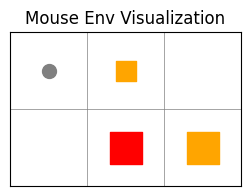

In [7]:
visualize_mouse_env(locations)

## Learning

/tmp/ipykernel_7200/2794621595.py:26: MatplotlibDeprecationWarning: 'col' must be an int or sequence of ints. Passing other types is deprecated since 3.8 and will be removed two minor releases later.
  table.auto_set_column_width(1.5)


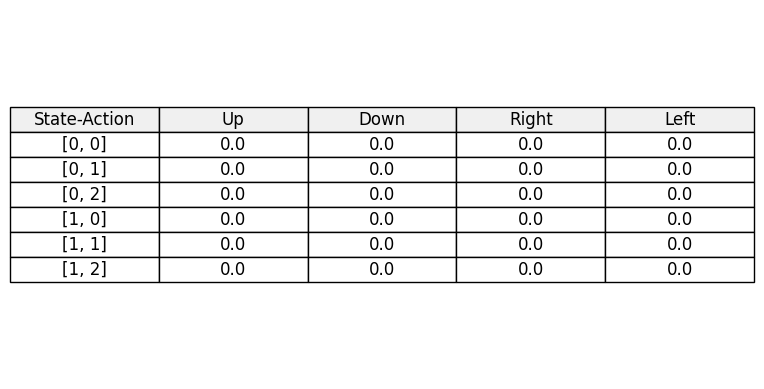

In [8]:
draw_q_table(state_action_values, actions)

In [9]:
learning_rate = 0.1
discount_rate = 0.5
current_location = locations['mouse']

In [18]:
action = 'Down'
next_location, reward = move(current_location, action, rewards)


formula = "Q(St, At) += learning_rate * [ Rt + discount_rate * max(Q(St+1, At+1)) - Q(St, At)]"
formatted_formula = f"Q[{current_location}, {action}] += {learning_rate} * [ {reward} + {discount_rate} * max(Q{next_location}, At+1) - Q{current_location}, {action}]"
calculated_formula = f"Q[{current_location}, {action}] += {learning_rate} * [ {reward} + {discount_rate} * {max(state_action_values[get_action_state_index(next_location)])} - {state_action_values[get_action_state_index(current_location), actions.index(action)]}]"

print(formula)
print(formatted_formula)
print(calculated_formula)

state_action_values[get_action_state_index(current_location), actions.index(action)] += learning_rate * (reward + discount_rate * max(state_action_values[get_action_state_index(next_location)]) - state_action_values[get_action_state_index(current_location), actions.index(action)])
current_location = next_location


Q(St, At) += learning_rate * [ Rt + discount_rate * max(Q(St+1, At+1)) - Q(St, At)]
Q[[0, 2], Down] += 0.1 * [ 3 + 0.5 * max(Q[1, 2], At+1) - Q[0, 2], Down]
Q[[0, 2], Down] += 0.1 * [ 3 + 0.5 * 0.0 - 0.0]


/tmp/ipykernel_7200/2794621595.py:26: MatplotlibDeprecationWarning: 'col' must be an int or sequence of ints. Passing other types is deprecated since 3.8 and will be removed two minor releases later.
  table.auto_set_column_width(1.5)


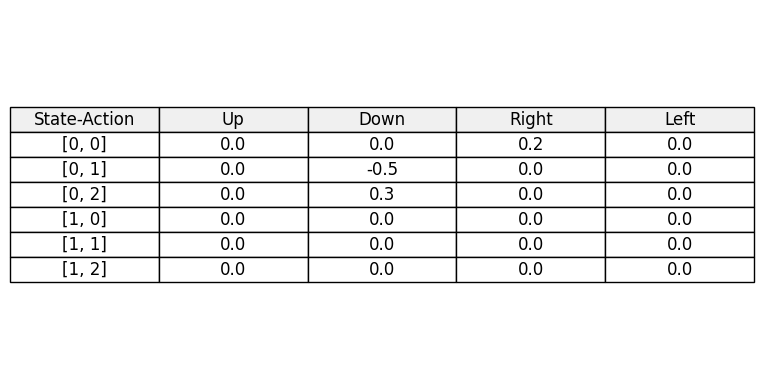

In [19]:
draw_q_table(state_action_values, actions)

## Simulation

In [20]:
def epsilon_greedy(action_values, epsilon=0.5):
    if np.random.random() < epsilon:
        return np.random.choice(len(action_values))
    else:
        return np.argmax(action_values)

In [21]:
def simulate(steps):
    current_location = locations['mouse']
    for i in range(steps):
        action = actions[epsilon_greedy(state_action_values[get_action_state_index(current_location)])]
        next_location, reward = move(current_location, action, rewards)
        state_action_values[get_action_state_index(current_location), actions.index(action)] += learning_rate * (reward + discount_rate * max(state_action_values[get_action_state_index(next_location)]) - state_action_values[get_action_state_index(current_location), actions.index(action)])
        current_location = next_location
    draw_q_table(state_action_values, actions)

/tmp/ipykernel_7200/2794621595.py:26: MatplotlibDeprecationWarning: 'col' must be an int or sequence of ints. Passing other types is deprecated since 3.8 and will be removed two minor releases later.
  table.auto_set_column_width(1.5)


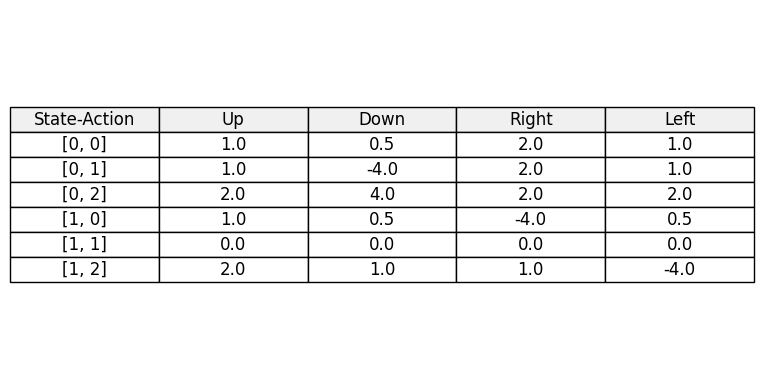

In [22]:
simulate(steps=int(1e5))

# 2. Navigate The Maze 🏁

## Utils

In [23]:
def visualize_maze(matrix, current_idx, start_idx=[2,0], finish_idx=[6,7], value_function=None, path=None):
    rows, cols = len(matrix), len(matrix[0])

    if value_function is None:
      value_function = np.zeros((rows, cols))

    # Create a binary image where 0 represents path and 1 represents a wall
    binary_matrix = np.array(matrix)

    # Plot the maze
    plt.figure(figsize=(cols//2, rows//2))
    plt.imshow(binary_matrix, cmap='binary', interpolation='nearest')

    # Add grid lines between each cell
    for i in range(cols - 1):
        plt.axvline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)
    for i in range(rows - 1):
        plt.axhline(i + 0.5, color='gray', linestyle='-', linewidth=0.5)

    # Display the start and finish points using scatter
    if path is None:
        plt.scatter(current_idx[1], current_idx[0], color='orange', s=300, marker='s', label='Current')
    else:
        plt.scatter([idx[1] for idx in path], [idx[0] for idx in path], color='orange', s=300, marker='s', label='Path')
    plt.scatter(start_idx[1], start_idx[0], color='green', s=200, marker='o', label='Start')
    plt.scatter(finish_idx[1], finish_idx[0], color='red', s=200, marker='o', label='Finish')

    # Display value function in each cell
    for i in range(rows):
        for j in range(cols):
            value = value_function[i][j]
            plt.text(j, i, f'{value:.1f}', color='black', ha='center', va='center')

    # Customize plot appearance
    plt.title('Maze Visualization')
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)  # Hide grid lines

    # Display the maze
    plt.show()

## Environment

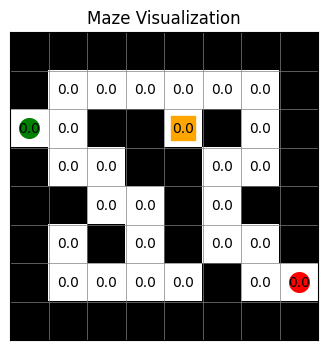

In [24]:
# Example usage:
matrix = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],
]

visualize_maze(matrix, current_idx=[2, 4])

## Q-Learning

### Setup

In [25]:
MATRIX = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],
]

START_INDEX = [2,0]
FINISH_INDEX = [6,7]

REWARDS = {
    'step': -1,
    'wall': -3,
    'finish': -1
}

ACTIONS = ['UP', 'DOWN', 'RIGHT', 'LEFT']

### Simulation

In [26]:
def move(action, current_index, finish_index, rewards):
    if action == 'UP':
        next_index = [current_index[0] - 1, current_index[1]]
        if next_index[0] >= 0 and MATRIX[next_index[0]][next_index[1]] == 0:
            if next_index == finish_index:
                return next_index, rewards['finish'], True
            return next_index, rewards['step'], False
        else:
            return current_index, rewards['wall'], False
    if action == 'DOWN':
        next_index = [current_index[0] + 1, current_index[1]]
        if next_index[0] < len(MATRIX) and MATRIX[next_index[0]][next_index[1]] == 0:
            if next_index == finish_index:
                return next_index, rewards['finish'], True
            return next_index, rewards['step'], False
        else:
            return current_index, rewards['wall'], False
    if action == 'RIGHT':
        next_index = [current_index[0], current_index[1] + 1]
        if next_index[1] < len(MATRIX[0]) and MATRIX[next_index[0]][next_index[1]] == 0:
            if next_index == finish_index:
                return next_index, rewards['finish'], True
            return next_index, rewards['step'], False
        else:
            return current_index, rewards['wall'], False
    if action == 'LEFT':
        next_index = [current_index[0], current_index[1] - 1]
        if next_index[1] >= 0 and MATRIX[next_index[0]][next_index[1]] == 0:
            if next_index == finish_index:
                return next_index, rewards['finish'], True
            return next_index, rewards['step'], False
        else:
            return current_index, rewards['wall'], False

### Policy

In [27]:
def epsilon_greedy_policy(action_values, step, max_steps):
    epsilon = 1 - step/max_steps
    if np.random.random() < epsilon:
        return np.random.choice(len(action_values))
    else:
        return np.argmax(action_values)

In [28]:
def greedy_policy(action_values):
    return np.argmax(action_values)

### Values

In [29]:
def get_state_values(state_action_values):
    return np.max(state_action_values, axis=2)

### Training

In [30]:
EPISODES = int(1e4)
MAX_STEPS = 50

LEARNING_RATE = 0.5
DISCOUNT_FACTOR = 0.9

STATE_ACTION_VALUES = np.zeros((len(MATRIX), len(MATRIX[0]), len(ACTIONS)))

In [32]:
def training():
    for episode in range(EPISODES):
        current_index = START_INDEX
        cumulative_reward = 0
        
        for step in range(MAX_STEPS):
            action = ACTIONS[epsilon_greedy_policy(STATE_ACTION_VALUES[current_index[0], current_index[1]], episode*MAX_STEPS+step, EPISODES*MAX_STEPS)]
            next_index, reward, terminated = move(action, current_index, FINISH_INDEX, REWARDS)
            
            STATE_ACTION_VALUES[current_index[0], current_index[1], ACTIONS.index(action)] += LEARNING_RATE * (reward + DISCOUNT_FACTOR * max(STATE_ACTION_VALUES[next_index[0], next_index[1]]) - STATE_ACTION_VALUES[current_index[0], current_index[1], ACTIONS.index(action)])
            
            current_index = next_index
            cumulative_reward += reward
            if terminated == True:
                break

        if episode % 1000 == 0:
            print(f"Episode {episode+1}/{EPISODES}, Cumulative Reward: {cumulative_reward}")
        
    return STATE_ACTION_VALUES

In [33]:
state_action_values = training()
state_values = get_state_values(state_action_values)

Episode 1/10000, Cumulative Reward: -102
Episode 1001/10000, Cumulative Reward: -90
Episode 2001/10000, Cumulative Reward: -80
Episode 3001/10000, Cumulative Reward: -90
Episode 4001/10000, Cumulative Reward: -30
Episode 5001/10000, Cumulative Reward: -32
Episode 6001/10000, Cumulative Reward: -29
Episode 7001/10000, Cumulative Reward: -27
Episode 8001/10000, Cumulative Reward: -21
Episode 9001/10000, Cumulative Reward: -15


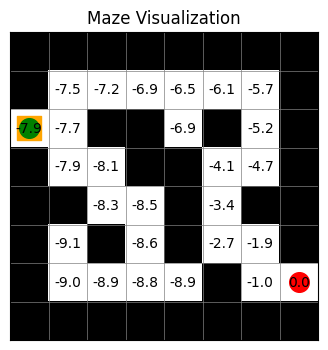

In [34]:
visualize_maze(MATRIX, current_idx=START_INDEX, value_function=state_values)

### Evaluation

In [35]:
def evaluate(state_action_values):
    current_index = START_INDEX
    path = [current_index]
    terminated = False
    while not terminated:
        action = ACTIONS[greedy_policy(STATE_ACTION_VALUES[current_index[0], current_index[1]])]
        next_index, reward, terminated = move(action, current_index, FINISH_INDEX, REWARDS)
        path.append(next_index)
        current_index = next_index
    return path

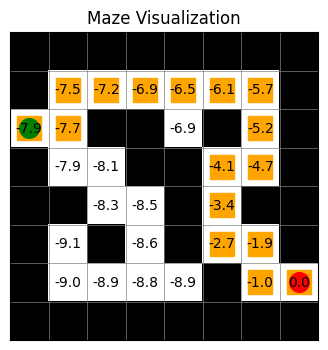

In [36]:
path = evaluate(state_action_values)
visualize_maze(MATRIX, current_idx=START_INDEX, value_function=state_values, path=path)